**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO **PLOT AN ROC CURVE & COMPUTE AUC USING `sklearn.metrics`**. 🐍🤖📊**

This script trains a simple classifier on the Iris dataset and evaluates it using a **confusion matrix** (per-class performance) and **accuracy score** (overall correctness).

### 📦 Import Libraries
We’ll use scikit-learn for data, model, and metrics; matplotlib for visualization.

In [1]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### 📥 Load Dataset & Create Train/Test Split

Use a binary dataset to make ROC meaningful and straightforward.

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target  # target: 0 = malignant, 1 = benign

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

### 🤖 Train a Probability-Output Classifier

We’ll fit `LogisticRegression` and get class probabilities for ROC.

In [3]:
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

# Predicted probabilities for the positive class (label 1)
y_proba = model.predict_proba(X_test)[:, 1]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 📊 Compute ROC Curve & AUC

`roc_curve` returns FPR, TPR across thresholds; `roc_auc_score` gives the AUC.

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print("AUC:", round(auc, 4))

AUC: 0.9956


### 🎨 Plot the ROC Curve

Add a diagonal baseline (random classifier) for reference.

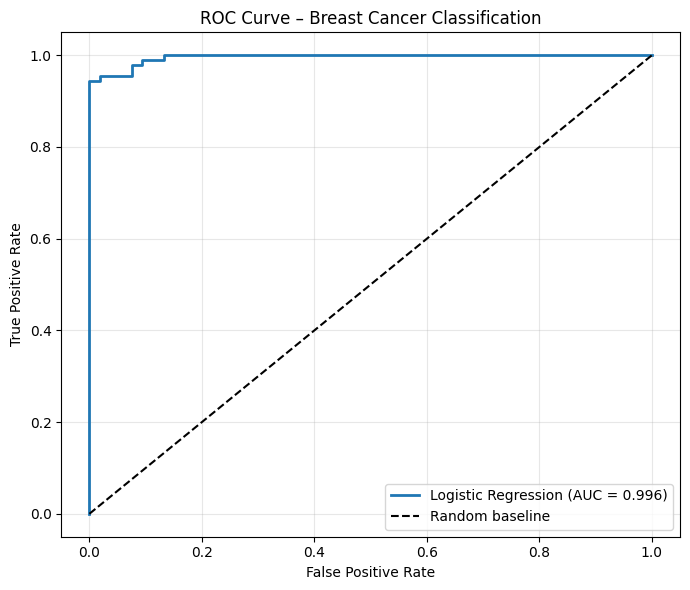

In [5]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Breast Cancer Classification")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()